In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# # Interactive plots
# %matplotlib notebook

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

timer = mypackage.utils.Timer()

TensorFlow version is 2.1.0


Using TensorFlow backend.


In [13]:
def split_for_zoom(x, y):
    def split_in_four(array, img):
        s, c = 32, 50
        array.append(img[c-s:c, c-s:c])
        array.append(img[c:c+s, c-s:c])
        array.append(img[c:c+s, c:c+s])
        array.append(img[c-s:c, c:c+s])
    X, Y = [], []
    split_in_four(X, x)
    split_in_four(Y, y)
    
    return np.array(X), np.array(Y)

def undo_one_image_split(Y, trim=False):
    s, c = 32, 50
    Y = np.squeeze(Y)
    img = np.zeros((100, 100))
    img[c-s:c, c-s:c] = Y[0]
    img[c:c+s, c-s:c] = Y[1]
    img[c:c+s, c:c+s] = Y[2]
    img[c-s:c, c:c+s] = Y[3]
    if trim:
        img = img[18:-18, 18:-18]
    return img

# x, y = split_for_zoom(X[0], Y[0])

# plt.figure()
# plt.imshow(np.squeeze(undo_one_image_split(y)))

# for i in range(len(x)):
#     plt.figure()
#     plt.imshow(np.squeeze(y[i]))
# x.shape, y.shape

In [3]:
# # Load the labeled data
# X, Y, info = mypackage.Dataset.load("data/tomra_all", only_with_contaminant=True)
# _, X, _ = mypackage.Dataset.scale(None, X, scaler='GlobalStandardization')

# print(X.shape, (X.min(), X.max()))
# print(np.unique(Y, return_counts=True))

(65, 100, 100, 208) (-7.217623, 11.974456)
(array([0, 1, 2], dtype=int32), array([554285,  88543,   7172]))


In [4]:
# Load the labeled data
dataset_folder = 'data/tomra_all'
file_list = ["20200213_113826_fillet_sample30", "20200213_113854_fillet_sample31", "20200213_113925_fillet_sample32", "20200213_113949_fillet_sample33", "20200213_114007_fillet_sample34", "20200213_114025_fillet_sample35", "20200213_114052_fillet_sample36", "20200213_114111_fillet_sample37", "20200213_114129_fillet_sample38", "20200213_114148_fillet_sample39"]

X, Y = mypackage.Dataset.load_files(file_list, dataset_folder, with_labels=True)
_, X, _ = mypackage.Dataset.scale(None, X, scaler='GlobalStandardization')

print(X.shape, (X.min(), X.max()))
print(np.unique(Y, return_counts=True))

(10, 100, 100, 208) (-5.6958165, 5.4056025)
(array([0, 1, 2], dtype=int32), array([85141, 13856,  1003]))


In [27]:
def get_classification_heat_map(y_hat, heat_maps):
    heat = np.zeros(y_hat.shape)
    heat[y_hat == 0] = heat_maps[..., 0][y_hat == 0]
    heat[y_hat == 1] = heat_maps[..., 1][y_hat == 1]
    heat[y_hat == 2] = heat_maps[..., 2][y_hat == 2]
    return heat

def plot_with_heat_map(y_hat, heat_maps, x, y):
    heat = get_classification_heat_map(y_hat, heat_maps)

    plt.figure(figsize=(9, 6))
    plt.subplot(121)
    plt.imshow(undo_one_image_split(heat, trim=True))
    plt.colorbar()
    plt.title("Model confidence of classification")
    plt.subplot(122)
    img = plt.imshow(undo_one_image_split(y_hat, trim=True))
    mypackage.Dataset._Dataset__add_legend_to_image(undo_one_image_split(y_hat), img)
    plt.title("Predicted labels")

    plt.figure(figsize=(9, 6))
    plt.subplot(121)
    plt.imshow(x[..., 138])
    plt.title("Input image")
    plt.subplot(122)
    img = plt.imshow(np.squeeze(y))
    mypackage.Dataset._Dataset__add_legend_to_image(undo_one_image_split(y_hat), img)
    plt.title("True labels")
    
def plot_results(y, y_hat):
    
    # Plot results
    plt.figure(figsize=(9, 5))
    plt.subplot(121)
    plt.imshow(undo_one_image_split(y))
    plt.title("True label")

    plt.subplot(122)
    img = plt.imshow(undo_one_image_split(y_hat))
    mypackage.Dataset._Dataset__add_legend_to_image(undo_one_image_split(y_hat), img)
    plt.title("Predicted labels")


Start training for 0 - 20200213_113826_fillet_sample30
Elapsed time: 164.7462 seconds


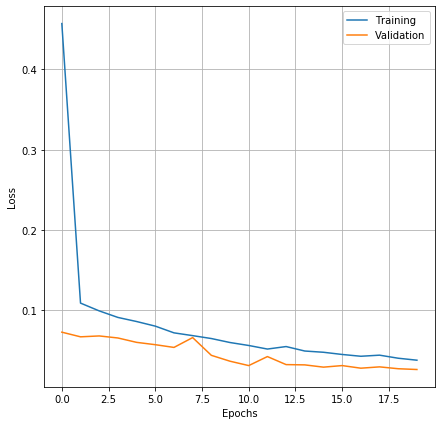

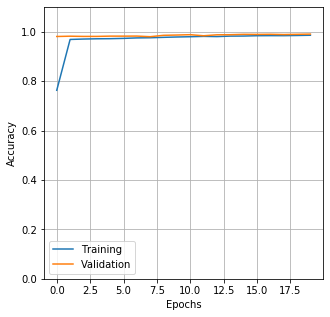

Predicting for train data
Elapsed time: 2.5659 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149801
           1       0.96      0.98      0.97     31980
           2       0.96      0.70      0.81      2539

    accuracy                           0.99    184320
   macro avg       0.97      0.89      0.92    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2554 seconds
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2702
           1       0.93      0.98      0.96      1310
           2       1.00      0.20      0.34        84

    accuracy                           0.97      4096
   macro avg       0.98      0.73      0.76      4096
weighted avg       0.97      0.97      0.97      4096

Elapsed time: 0.2818 seconds
Start training for 1 - 20200213_113854_fillet_sample31
Elapsed time: 164.8640 seconds


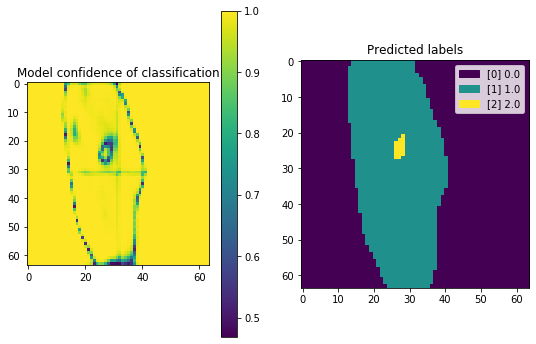

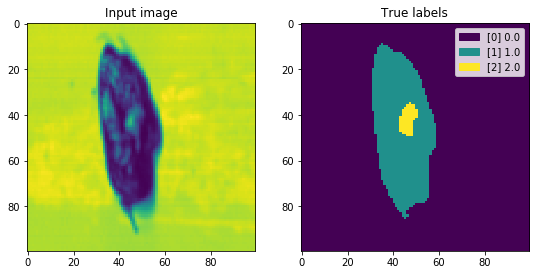

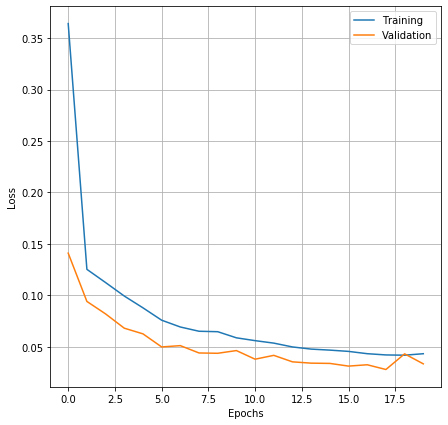

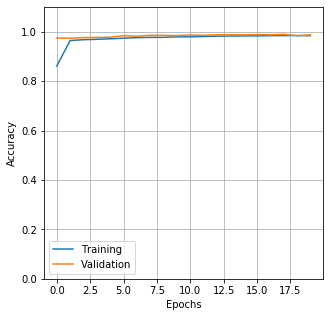

Predicting for train data
Elapsed time: 2.4023 seconds
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    147563
           1       0.97      0.96      0.97     34333
           2       0.90      0.77      0.83      2424

    accuracy                           0.99    184320
   macro avg       0.96      0.91      0.93    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2364 seconds
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2738
           1       0.93      0.99      0.96      1277
           2       1.00      0.16      0.28        81

    accuracy                           0.97      4096
   macro avg       0.98      0.71      0.74      4096
weighted avg       0.98      0.97      0.97      4096

Elapsed time: 0.2612 seconds
Start training for 2 - 20200213_113925_fillet_sample32
Elapsed time: 159.2674 seconds


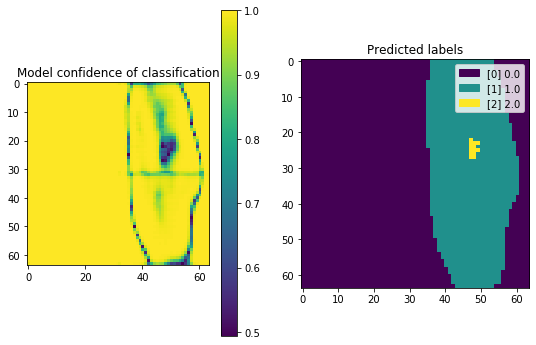

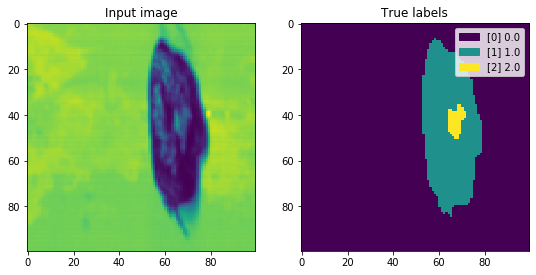

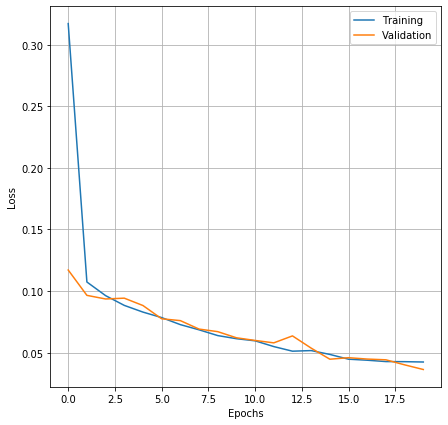

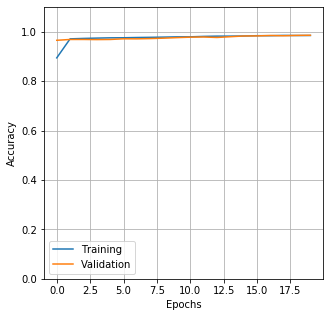

Predicting for train data
Elapsed time: 2.3453 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    150870
           1       0.94      0.98      0.96     31360
           2       0.96      0.60      0.74      2090

    accuracy                           0.99    184320
   macro avg       0.97      0.86      0.90    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2389 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2737
           1       0.95      1.00      0.98      1264
           2       1.00      0.46      0.63        95

    accuracy                           0.98      4096
   macro avg       0.98      0.82      0.87      4096
weighted avg       0.99      0.98      0.98      4096

Elapsed time: 0.2635 seconds
Start training for 3 - 20200213_113949_fillet_sample33
Elapsed time: 158.6457 seconds


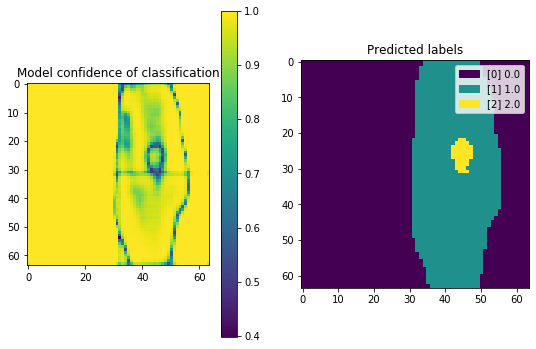

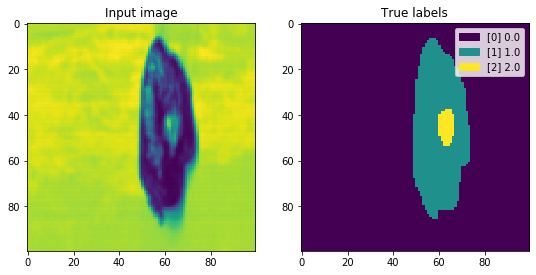

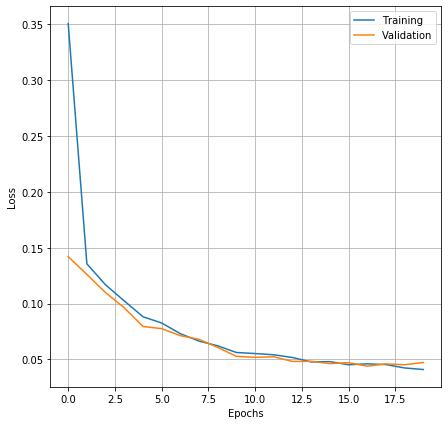

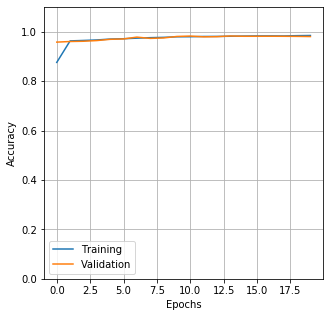

Predicting for train data
Elapsed time: 2.3123 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    142821
           1       0.95      0.98      0.97     38583
           2       0.98      0.65      0.78      2916

    accuracy                           0.99    184320
   macro avg       0.98      0.87      0.91    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2345 seconds
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2810
           1       0.93      0.99      0.96      1209
           2       1.00      0.51      0.67        77

    accuracy                           0.98      4096
   macro avg       0.98      0.83      0.87      4096
weighted avg       0.98      0.98      0.97      4096

Elapsed time: 0.2591 seconds
Start training for 4 - 20200213_114007_fillet_sample34
Elapsed time: 157.5494 seconds


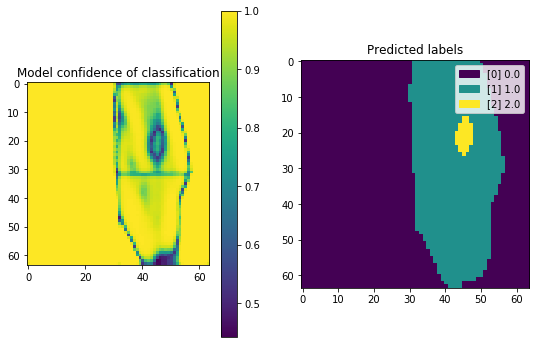

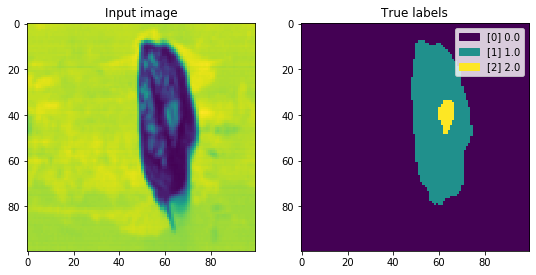

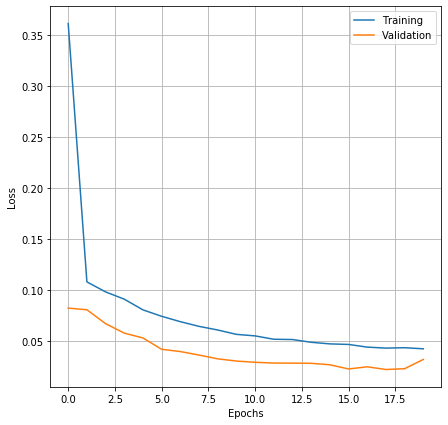

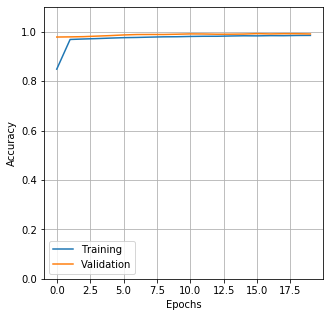

Predicting for train data
Elapsed time: 2.3093 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    148872
           1       0.95      0.98      0.97     33035
           2       0.95      0.72      0.82      2413

    accuracy                           0.99    184320
   macro avg       0.97      0.90      0.93    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2337 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2778
           1       0.95      0.99      0.97      1213
           2       1.00      0.70      0.83       105

    accuracy                           0.98      4096
   macro avg       0.98      0.90      0.93      4096
weighted avg       0.98      0.98      0.98      4096

Elapsed time: 0.2580 seconds
Start training for 5 - 20200213_114025_fillet_sample35
Elapsed time: 156.8837 seconds


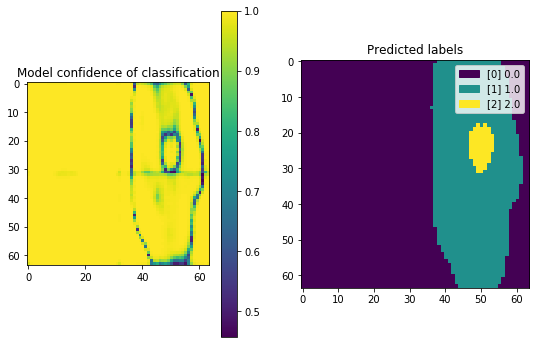

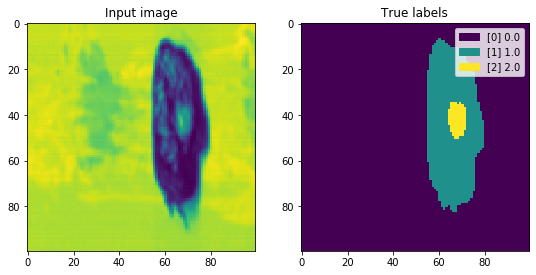

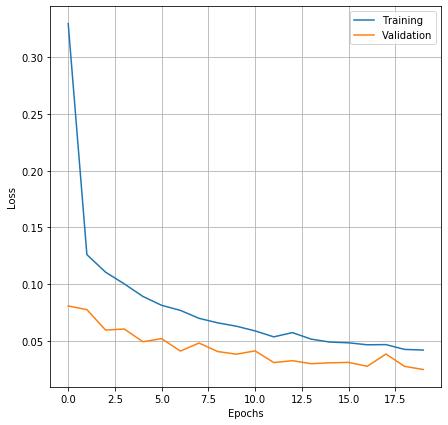

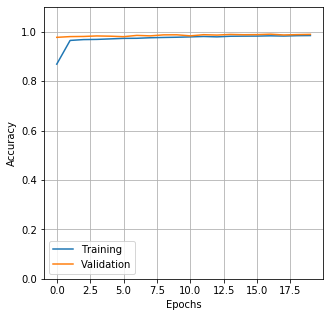

Predicting for train data
Elapsed time: 2.2958 seconds
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    144743
           1       0.96      0.98      0.97     37121
           2       0.98      0.69      0.81      2456

    accuracy                           0.99    184320
   macro avg       0.98      0.89      0.92    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2343 seconds
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2792
           1       0.93      1.00      0.96      1197
           2       1.00      0.72      0.84       107

    accuracy                           0.98      4096
   macro avg       0.98      0.90      0.93      4096
weighted avg       0.98      0.98      0.98      4096

Elapsed time: 0.2587 seconds
Start training for 6 - 20200213_114052_fillet_sample36
Elapsed time: 164.7738 seconds


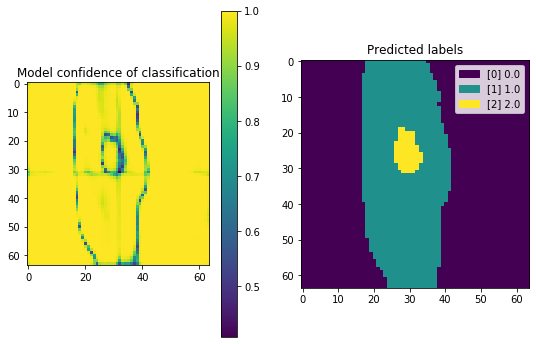

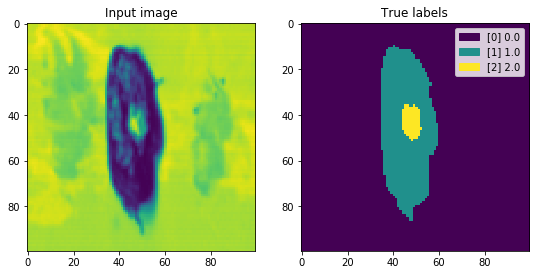

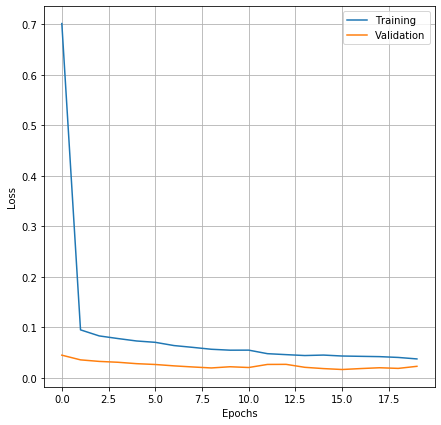

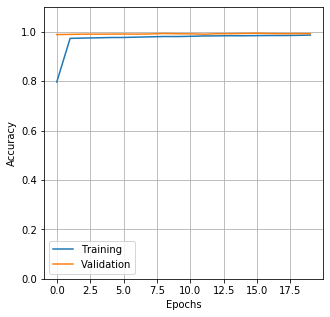

Predicting for train data
Elapsed time: 2.4099 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    151551
           1       0.95      0.98      0.97     30714
           2       0.96      0.60      0.74      2055

    accuracy                           0.99    184320
   macro avg       0.97      0.86      0.90    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2645 seconds
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2792
           1       0.92      1.00      0.96      1195
           2       0.94      0.72      0.81       109

    accuracy                           0.97      4096
   macro avg       0.95      0.90      0.92      4096
weighted avg       0.98      0.97      0.97      4096

Elapsed time: 0.2911 seconds
Start training for 7 - 20200213_114111_fillet_sample37
Elapsed time: 169.9759 seconds


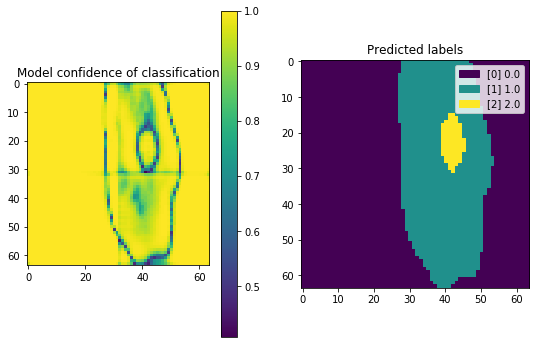

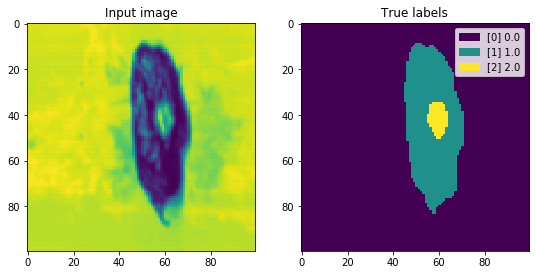

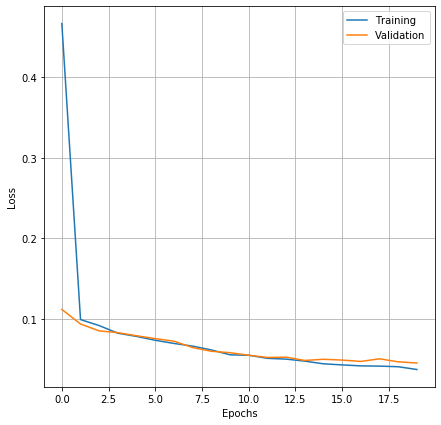

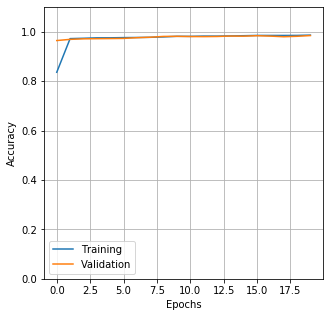

Predicting for train data
Elapsed time: 2.4576 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    148691
           1       0.96      0.98      0.97     33201
           2       0.92      0.79      0.85      2428

    accuracy                           0.99    184320
   macro avg       0.96      0.92      0.94    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2487 seconds
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2700
           1       0.98      0.96      0.97      1296
           2       1.00      0.91      0.95       100

    accuracy                           0.98      4096
   macro avg       0.99      0.96      0.97      4096
weighted avg       0.98      0.98      0.98      4096

Elapsed time: 0.2752 seconds
Start training for 8 - 20200213_114129_fillet_sample38
Elapsed time: 166.7138 seconds


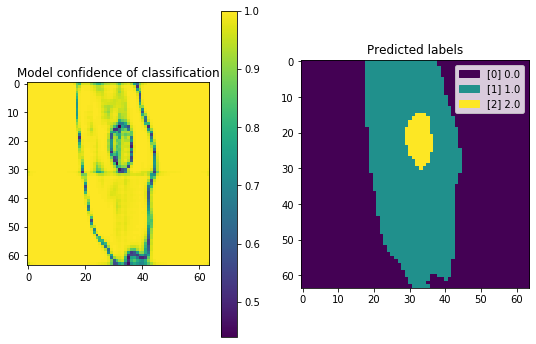

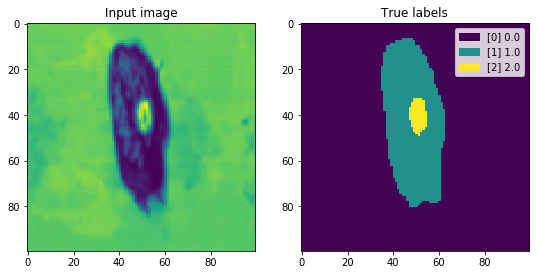

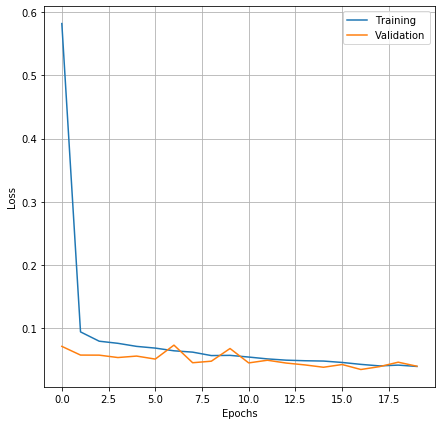

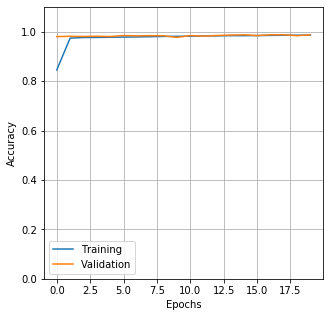

Predicting for train data
Elapsed time: 2.3638 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    148822
           1       0.95      0.99      0.97     33579
           2       0.95      0.56      0.71      1919

    accuracy                           0.99    184320
   macro avg       0.97      0.85      0.89    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2462 seconds
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2680
           1       0.96      0.97      0.97      1294
           2       1.00      0.33      0.49       122

    accuracy                           0.97      4096
   macro avg       0.98      0.77      0.81      4096
weighted avg       0.97      0.97      0.96      4096

Elapsed time: 0.2714 seconds
Start training for 9 - 20200213_114148_fillet_sample39
Elapsed time: 167.3749 seconds


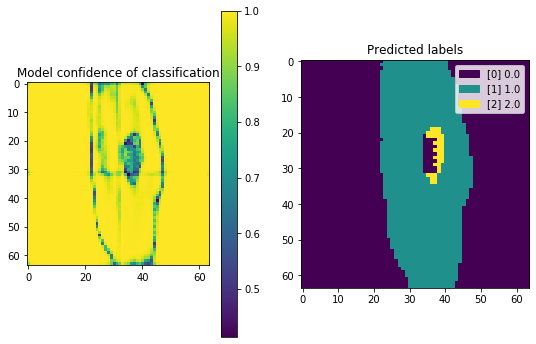

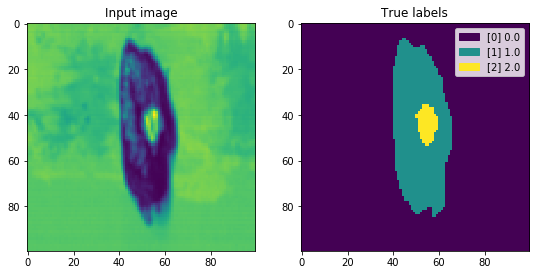

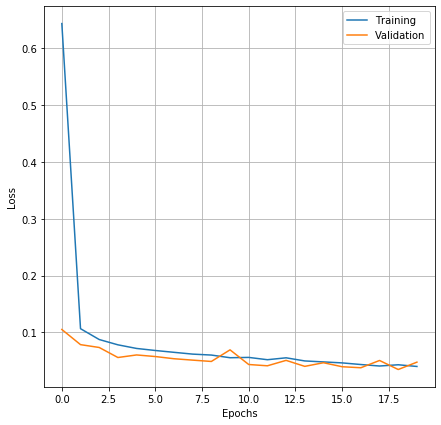

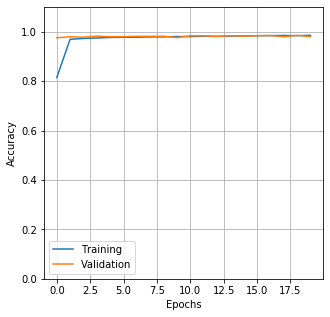

Predicting for train data
Elapsed time: 2.4029 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    147790
           1       0.94      0.99      0.96     34839
           2       0.98      0.51      0.67      1691

    accuracy                           0.99    184320
   macro avg       0.97      0.83      0.88    184320
weighted avg       0.99      0.99      0.99    184320

Predicting for test data
Elapsed time: 0.2397 seconds
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2681
           1       0.96      0.96      0.96      1292
           2       1.00      0.60      0.75       123

    accuracy                           0.97      4096
   macro avg       0.98      0.85      0.90      4096
weighted avg       0.98      0.97      0.97      4096

Elapsed time: 0.2646 seconds


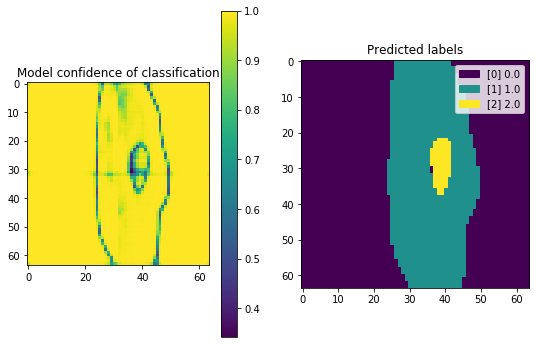

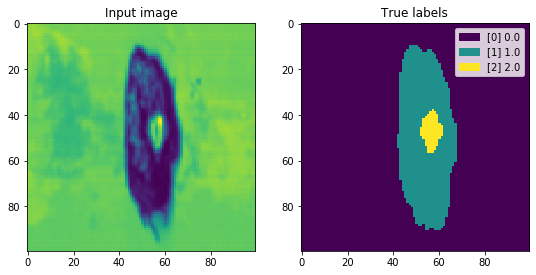

In [219]:
def select_one(X, i):
    return X[np.arange(len(X)) != i], X[i]

# i = 0
for i, file_name in enumerate(file_list): # [0, 23, 24, 31, 35, 57, 63]: # range(len(X))
#     Do CV on each image / Or on each set of 10 images

    X_rest, x_validation = select_one(X, i)
    Y_rest, y_validation = select_one(Y, i)
    X_train, Y_train = mypackage.Dataset.make_zoomed_in_dataset(X_rest, Y_rest, size=32, sample_multiplication=20, contaminant_type=2, zoom_with_noise=0.8)
    
    unet = mypackage.SpectralUNet(X_train, Y_train, batchnorm=False, dropout=0.5)
    print(f"Start training for {i} - {file_name}")
    timer.start()
    unet.train(batch_size=5, epochs=20, validation_split=0.1, clear_output=False, monitor='val_loss', mode='min', verbose=0)
    timer.stop()
    unet.plot_training_results()

    print("Predicting for train data")
    unet.predict(X_train, Y_labels=Y_train, plot=False)

    x, y = split_for_zoom(x_validation, y_validation)
    print("Predicting for test data")
    timer.start()
    y_hat, heat_maps = unet.predict(x, Y_labels=y, plot=False, return_heat_map=True)
    timer.stop()

    plot_with_heat_map(y_hat, heat_maps, x_validation, y_validation)

In [9]:
y_hat.shape, heat_maps.shape, np.unique(y_hat), heat_maps[y_hat].shape

((4, 32, 32), (4, 32, 32, 3), array([0, 1, 2]), (4, 32, 32, 32, 32, 3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



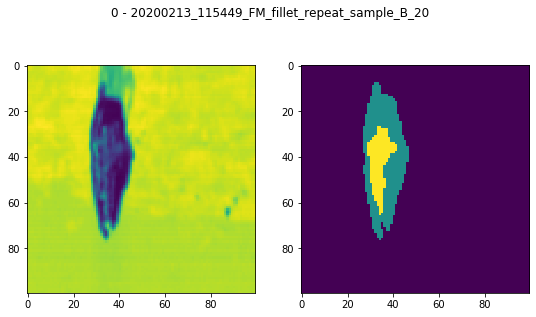

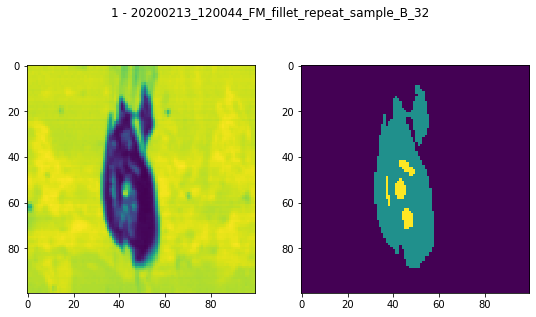

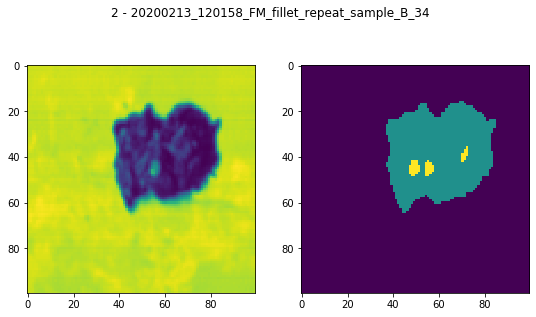

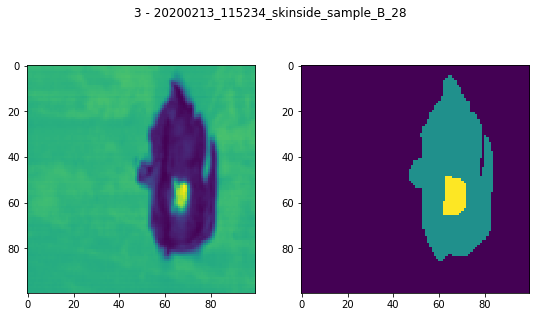

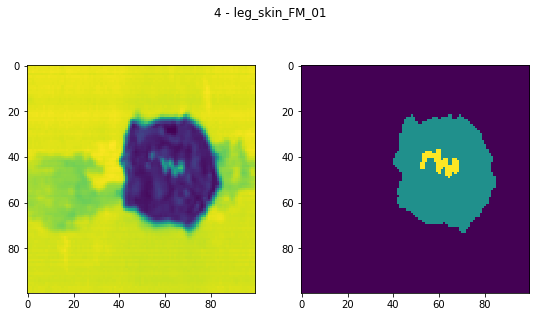

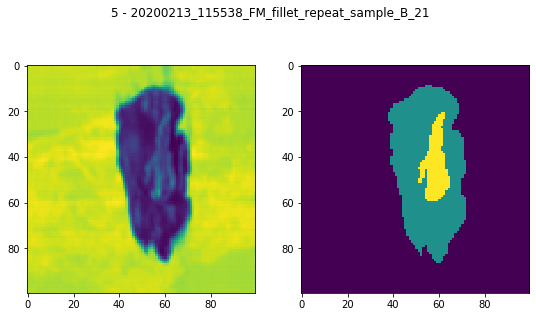

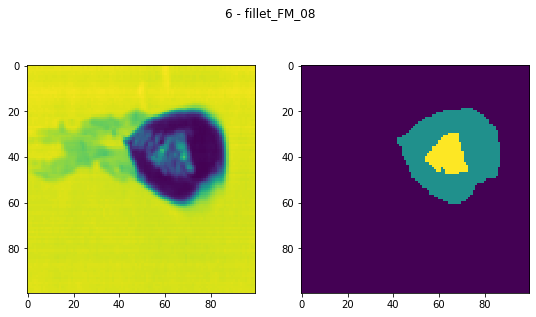

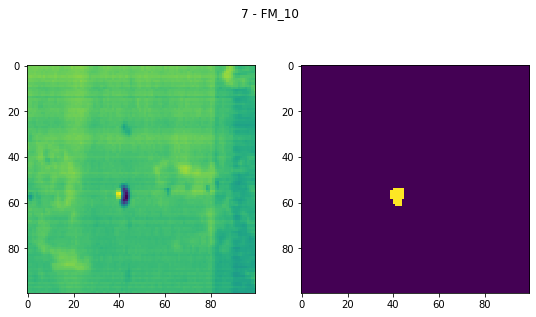

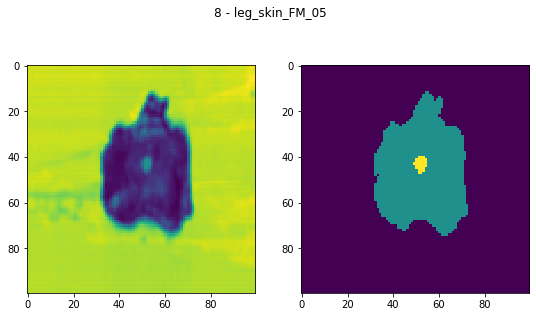

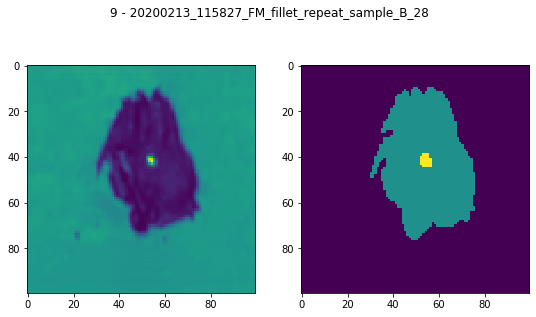

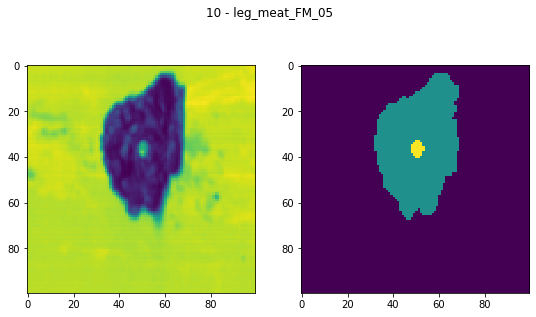

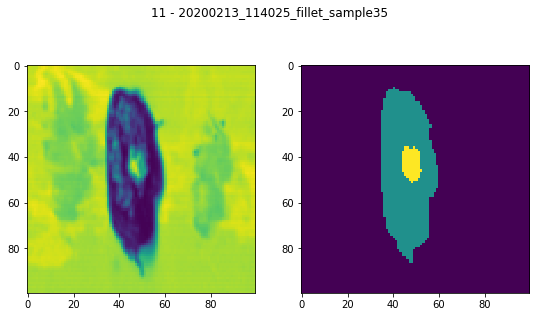

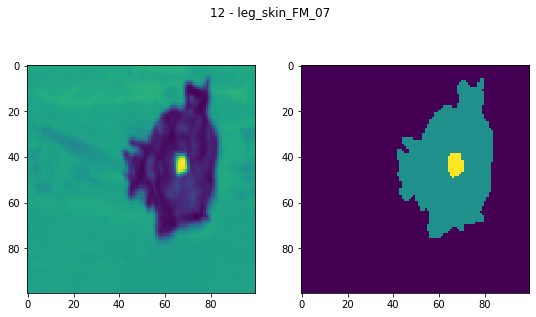

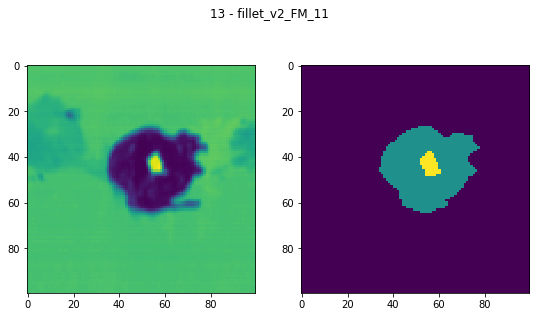

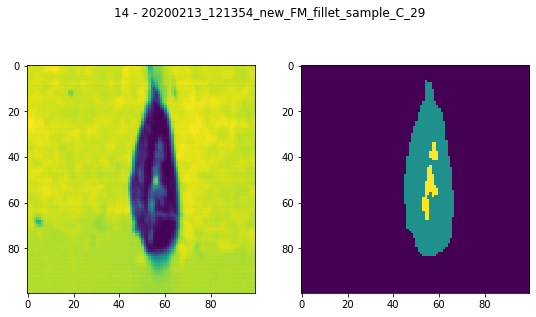

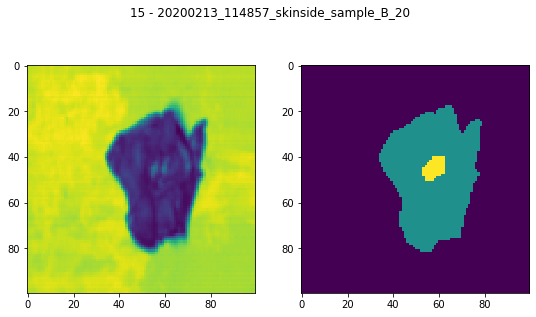

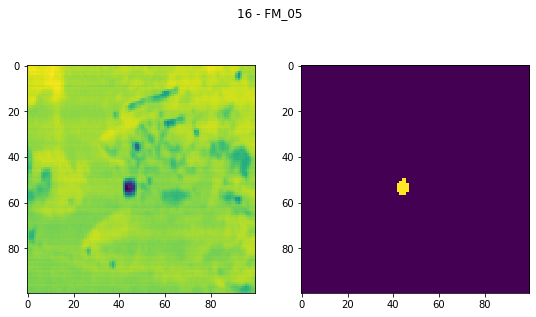

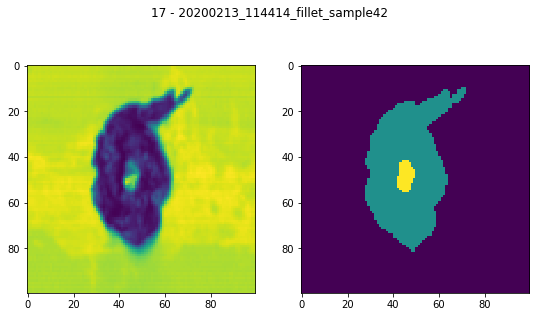

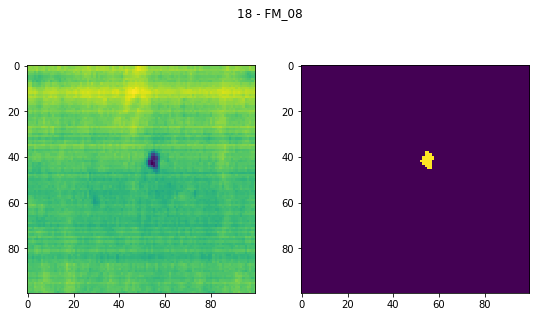

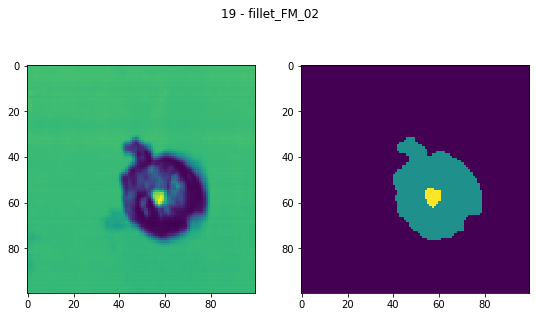

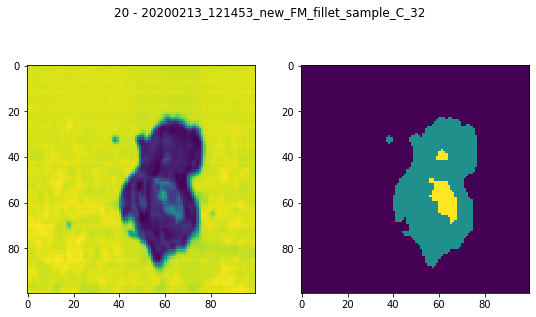

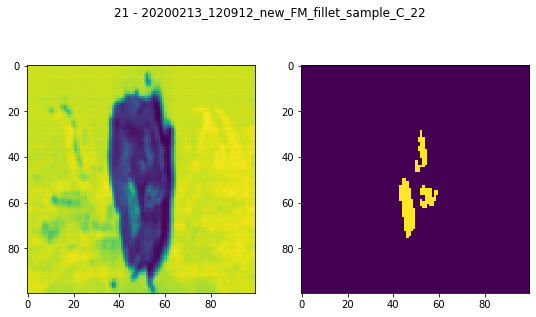

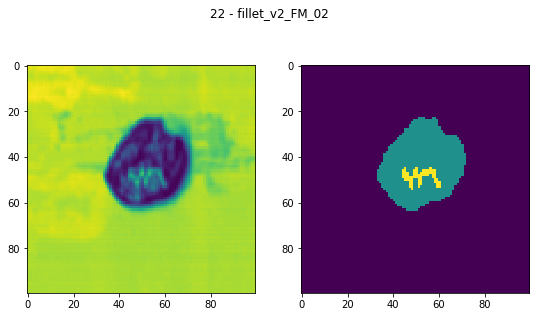

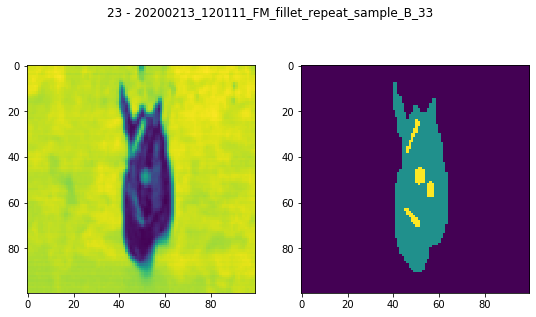

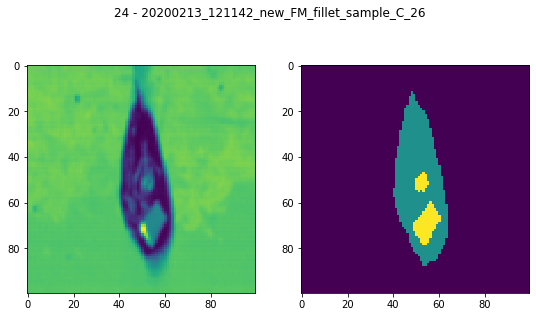

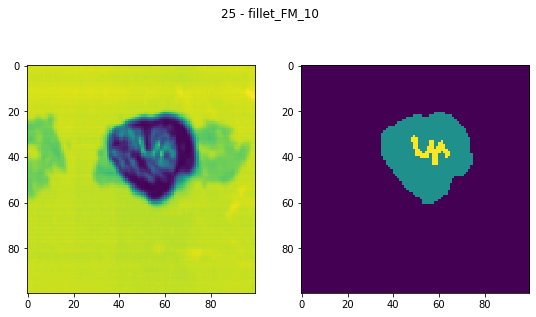

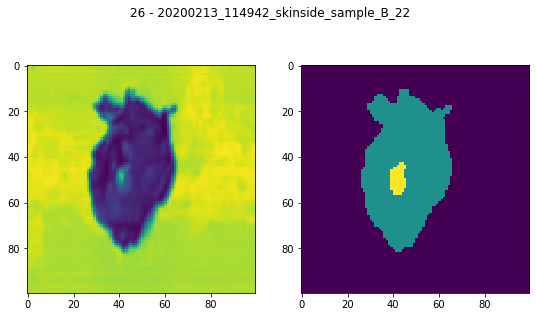

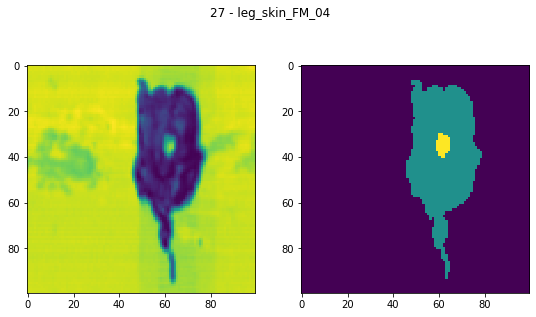

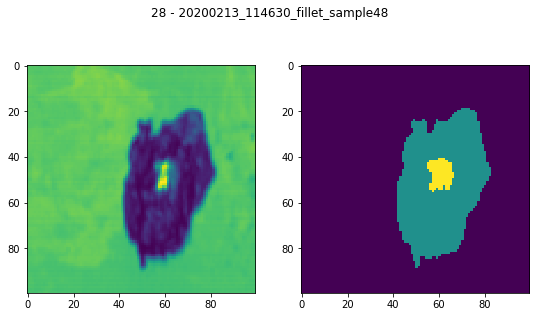

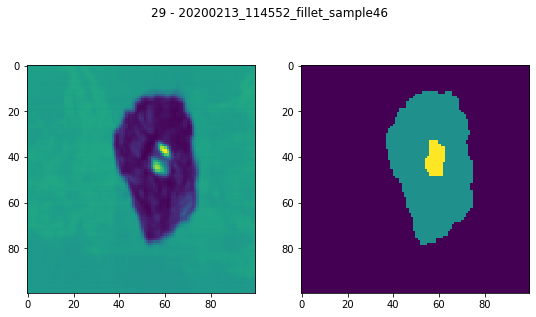

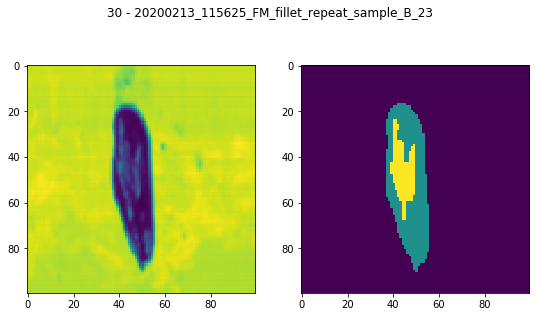

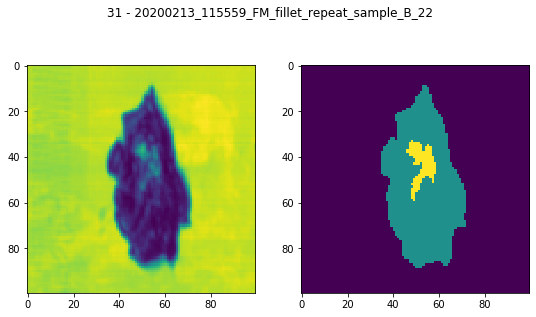

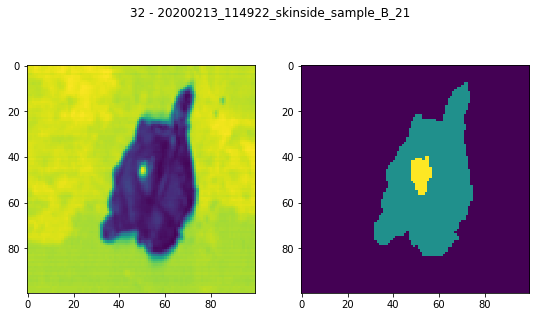

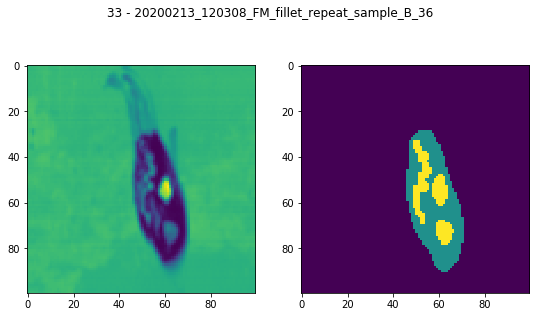

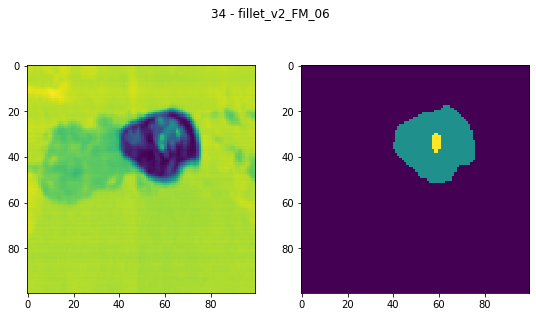

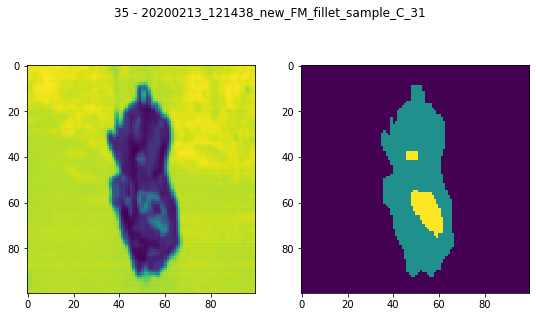

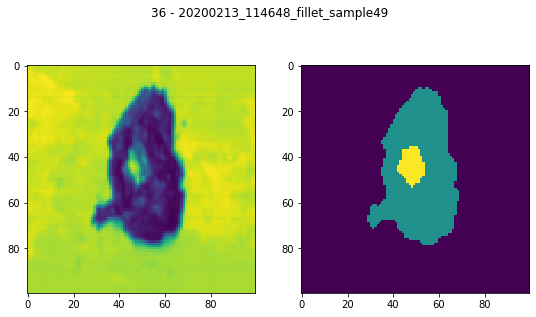

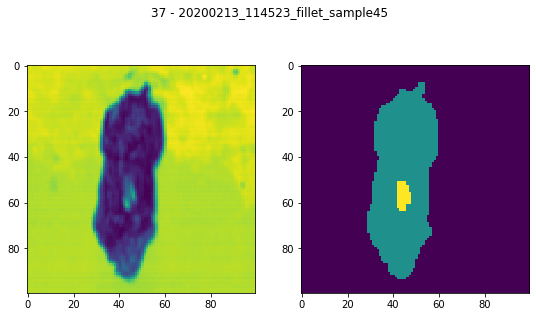

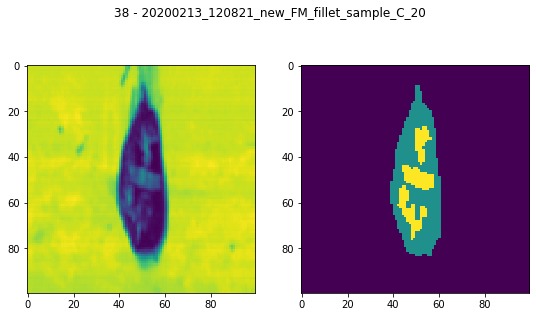

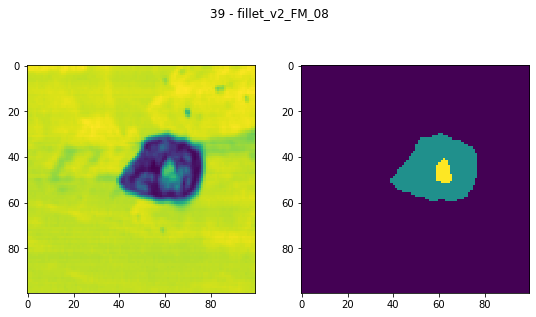

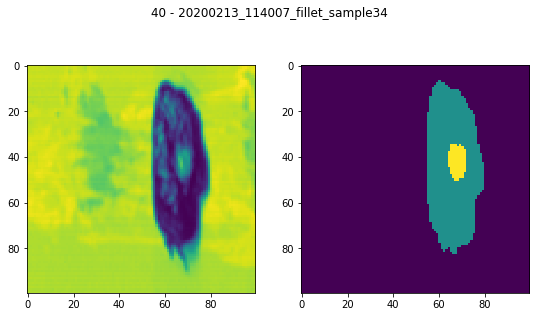

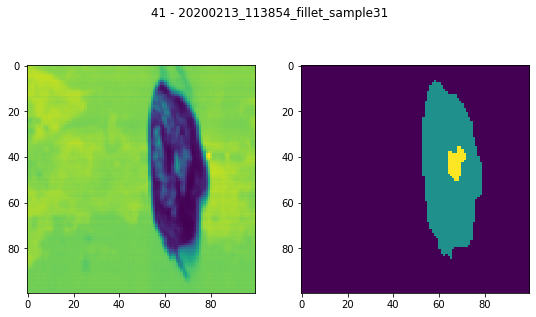

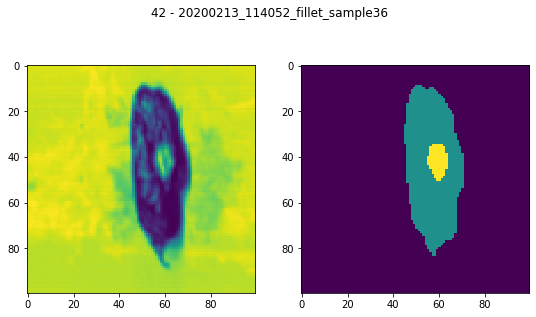

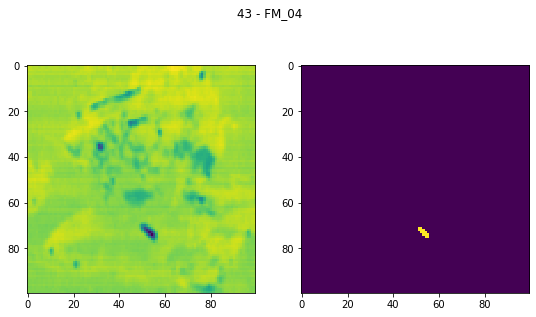

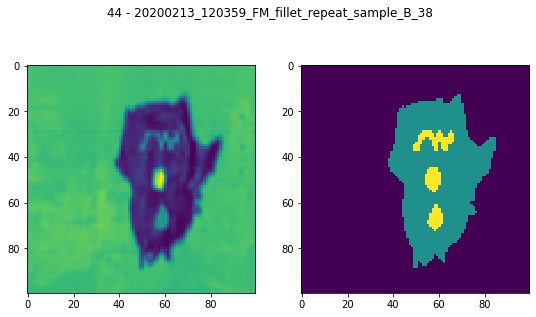

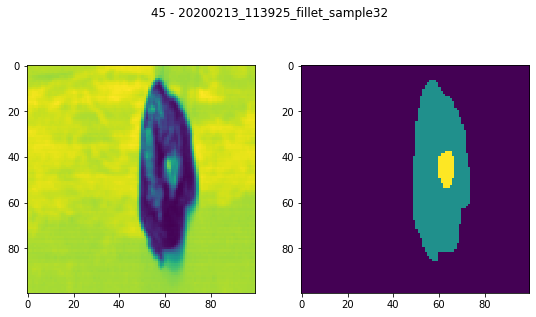

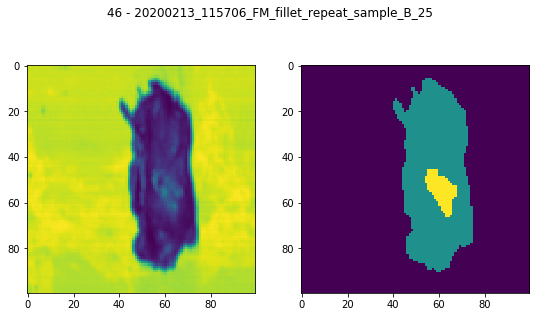

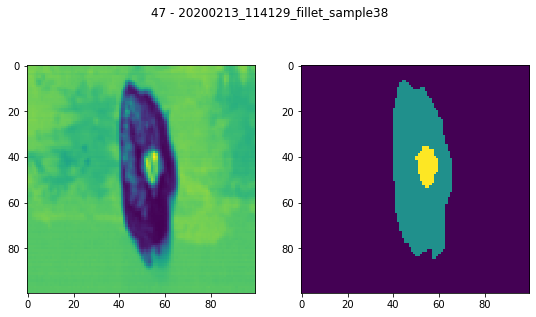

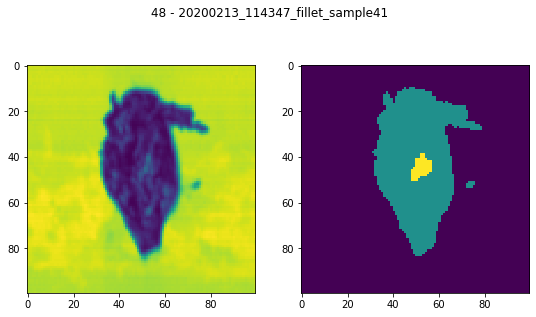

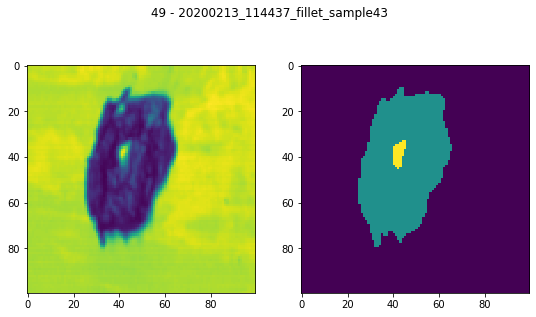

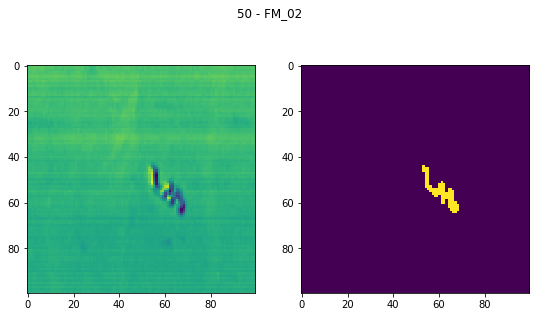

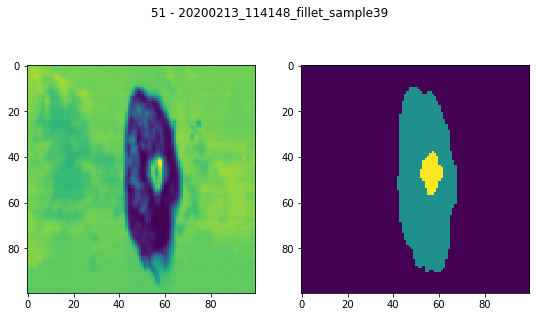

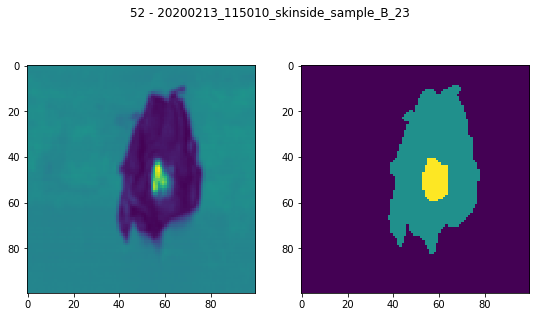

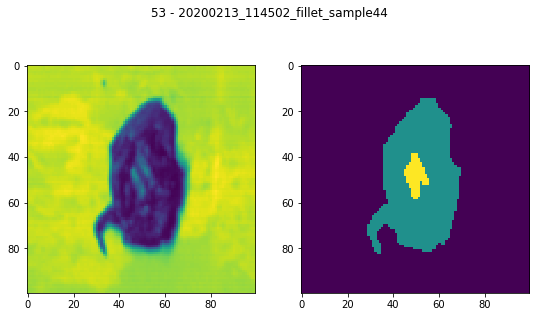

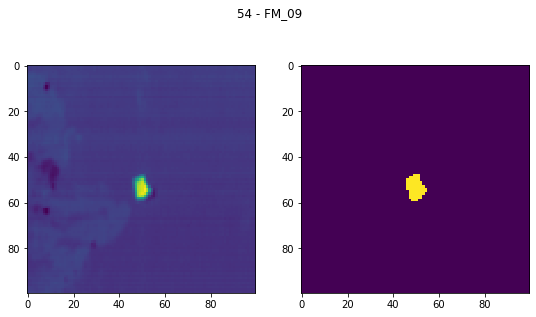

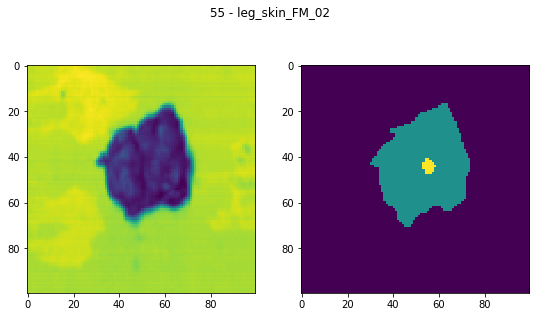

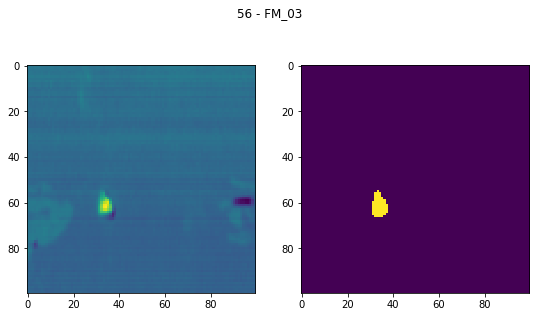

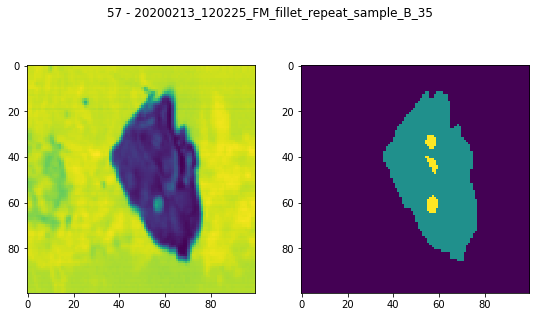

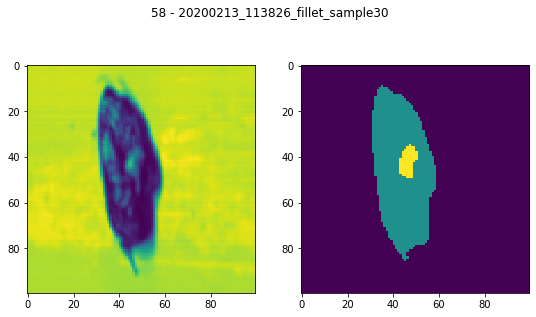

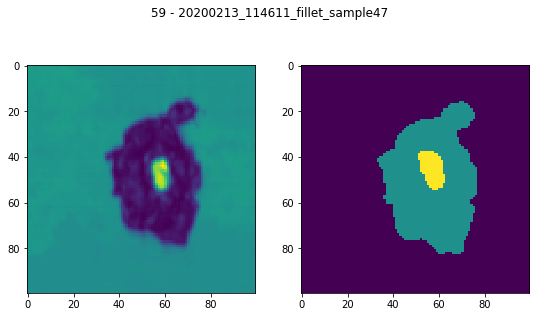

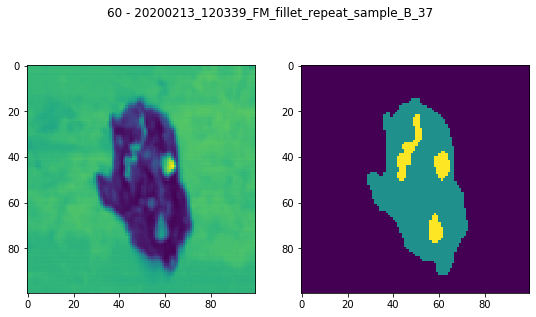

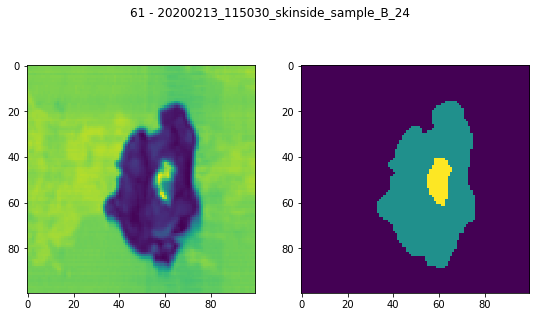

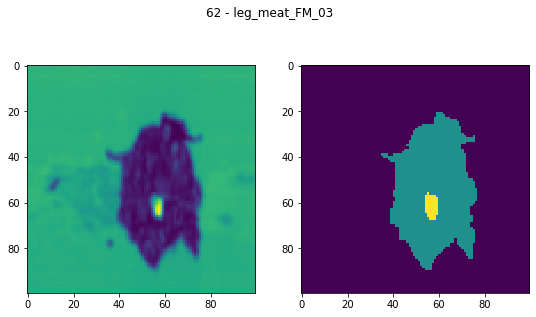

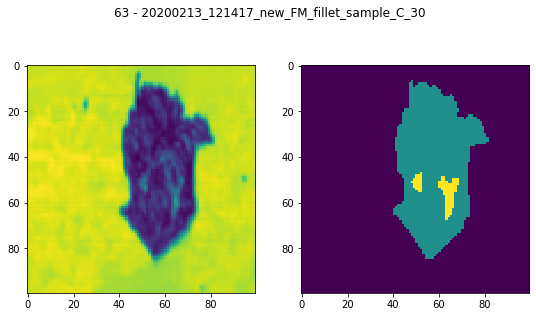

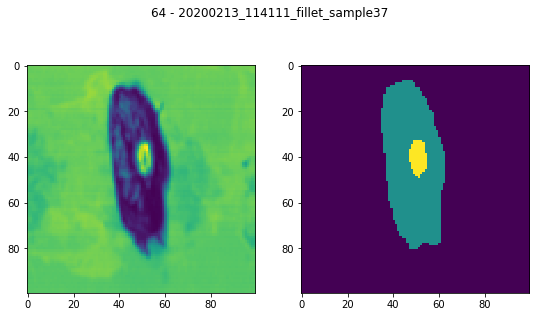

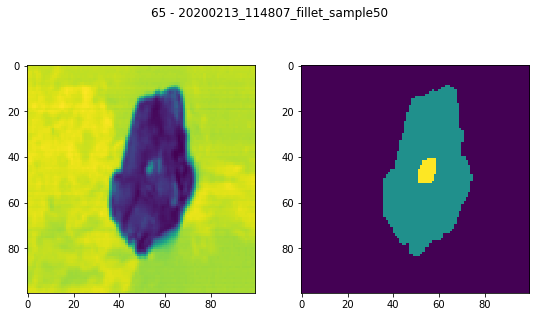

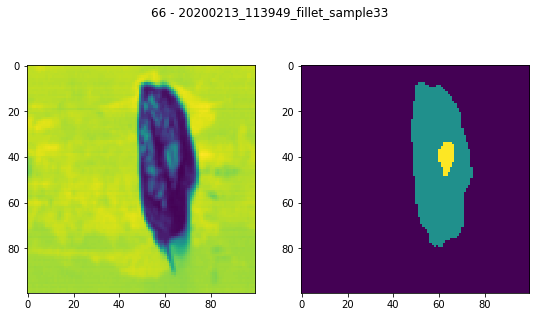

In [36]:
for i, file_name in enumerate(info):
    fig = plt.figure(figsize=(9, 5))
    fig.suptitle(f"{i} - {file_name}")
    plt.subplot(121)
    plt.imshow(X[i, :, :, 138])
    plt.subplot(122)
    plt.imshow(Y[i, :, :, 0])
